In [65]:
from veering import taut_polytope
from veering import taut
from veering import taut_homology
from veering import taut_carried
from veering import fundamental_domain
from veering import taut_polynomial
from sage.plot.contour_plot import ContourPlot
import time

sig = 'eLMkbcddddedde_2100' # minimal direction: (1,0); not sure what to plug in to optimize norm dila. This is Hironaka's example. Rays through (a,1) are primitive, realize every genus, and converge to the minimizer.
#sig = 'fLLQcbecdeepuwsua_20102' # minimal direction: (-1,1); to optimize norm dila, plug in (-2,2).
#sig = 'fLLQcbeddeehhbghh_01110' # minimal direction: (1,0); SAME MIN NORM DILA AS HIRONAKA; not sure what to plug in to optimize norm dila. This is the Whitehead Sister Link (Dehn filled 3-Chain Link along the slope -3/2)
#sig = 'gLLAQcdecfffhsermws_122201' # minimal direction: (0.74733, -0.419585)~(16,-9); not sure what to plug in to optimize norm dila.
#sig = 'gLLAQcededffiikajwn_011220' # This one doesn't work for some reason. Doesn't find the extreme rays of the cone.
#sig = 'gLLPQccdfeffhggaagb_201022' # minimal direction: (1,0); to optimize norm dila, plug in (1,0).
#sig = 'gLLPQcdfefefuoaaauo_022110' # minimal direction: (-0.522425, -0.420164)~(-10,-8); to optimize norm dila, plug in (-10,-8).
#sig = 'hLALMkbcbefggghhwsemws_2112201' # minimal direction: (0.912663, -0.310724)~(-3,1); not sure what to plug in to optimize norm dila.
#sig = 'hLLAAkcededfggiikajwxn_0112201' # This one also doesn't work.
#sig = 'hLLLQkacgfefggjkjjfjko_2002121'
#sig = 'hLLLQkbeegefgghhhahabg_1200111'
#sig = 'hLLLQkbeegefgghhhahabg_0111022'
#sig = 'hLLLQkcegfeegghhhahabg_2010222'
#sig = 'hLLMMkaedfdgggjxaxjxqh_2002110' # This one only has one boundary component! And doesn't work for some reason.
#sig = 'hLLPMkccdfeggghggaahah_2010221'
#sig = 'hvLPQkcdegffggbbgaaahg_1020211'
#sig = 'iLALMPcbcbefgghhhhwsemstj_21122012' # This one also doesn't work.
#sig = 'iLAwMPcbcbdfghhhxxnxrpirf_01101122' # This one takes a long time to compute the taut poly.
#sig = 'iLLALQcbcdefghhhtsfxjoxqt_20102120'
tri, angle = taut.isosig_to_tri_angle(sig) # Some functions take the triangulation and the angle structure in separately

In [66]:
extreme_rays = taut_polytope.cone_in_homology(sig) # These are rays spanning the cone of carried classes
rays = taut_polytope.taut_rays(sig) # These are rays spanning the cone of carried surfaces
P = taut_polytope.projection_to_homology(sig)
extreme_surfs = []

for ray in rays: # this for loop stores the surfaces (in terms of their branch equations) that define the boundary of the cone
    if P*ray in extreme_rays:
        temp = 0
        for surf in extreme_surfs:
            if P*surf != P*ray:
                temp = temp + 1
        if temp == len(extreme_surfs):
            extreme_surfs.append(ray)
        
if [tuple(extreme_rays[0]), tuple(extreme_rays[1])] != [tuple(P*extreme_surfs[0]), tuple(P*extreme_surfs[1])]:
    extreme_surfs.reverse()

sums = [] # next we add up the number of triangles in the boundary surfaces
for surf in extreme_surfs:
    count = 0
    for i in range(len(surf)):
        count = count + surf[i]
    sums.append(count)

tnorms = [term/2 for term in sums] # their Thurston norms are half the number of boundary components
        
corners = []
for i in range(len(extreme_rays)):
    corners.append([0]*len(extreme_rays[i]))
    
for i in range(len(corners)): # the corners of the fibered face are the boundaries divided by the Thurston norm.
    for j in range(len(corners[i])):
        corners[i][j] = extreme_rays[i][j]/tnorms[i]
        
corners

[[1/2, -1/2], [1/2, 1/2]]

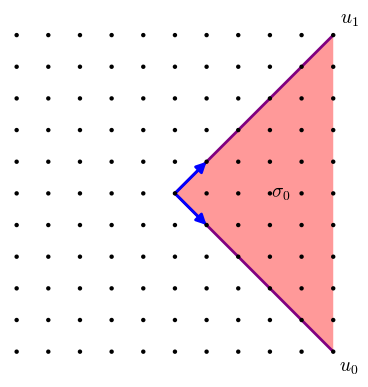

In [67]:
cone = Cone(corners) # cone is now the fibered cone in H_2(M, dM) corresponding to this veering triangulation.
cone_plot = cone.plot(mode='box', xmin = -5, xmax = 5, ymin = -5, ymax = 5, ray_thickness=2, point_size=10)
cone_plot

In [68]:
def Thurston_norm_nums(point):
    
    if not cone.interior_contains(point):
        raise ValueError('Your point is not in the fibered cone specified by the given veering triangulation')
    
    if len(point) != len(extreme_rays[0]):
        raise ValueError('Your point must be of dimension', len(extreme_rays[0])) 
        
    eq1 = (var('r')*P*extreme_surfs[0] + var('s')*P*extreme_surfs[1])[0] == point[0]
    eq2 = (var('r')*P*extreme_surfs[0] + var('s')*P*extreme_surfs[1])[1] == point[1]
    lin_comb = solve([eq1,eq2],r,s) # find the linear combination of the boundary vectors which give our point.

    tris = lin_comb[0][0].rhs()*extreme_surfs[0] + lin_comb[0][1].rhs()*extreme_surfs[1] # get the corresponding branch equations
    
    prenorm = 0
    for term in tris:
        prenorm = prenorm + term
        
    return prenorm/2

In [69]:
def Thurston_norm_vars(point): # This version just doesn't check if the input is in the cone.
    
    if len(point) != len(extreme_rays[0]):
        raise ValueError('Your point must be of dimension', len(extreme_rays[0])) 
        
    eq1 = (var('r')*P*extreme_surfs[0] + var('s')*P*extreme_surfs[1])[0] == point[0]
    eq2 = (var('r')*P*extreme_surfs[0] + var('s')*P*extreme_surfs[1])[1] == point[1]
    lin_comb = solve([eq1,eq2],r,s) # find the linear combination of the boundary vectors which give our point.

    tris = lin_comb[0][0].rhs()*extreme_surfs[0] + lin_comb[0][1].rhs()*extreme_surfs[1] # get the corresponding branch equations
    
    prenorm = 0
    for term in tris:
        prenorm = prenorm + term
        
    return prenorm/2

In [70]:
Thurston_norm_vars((var('a'),var('b')))

2*a

In [71]:
#boundaries_from_surf1 = taut_carried.boundary_cycles_from_surface(tri, angle, extreme_surfs[0]) # these are ther boundary classes in terms of branch equations
#boundaries_from_surf2 = taut_carried.boundary_cycles_from_surface(tri, angle, extreme_surfs[1])

#faces_in_hom = taut_homology.faces_in_homology(tri, angle, [])

#boundary_classes_from_surf1 = [vector((0,0))]*len(boundaries_from_surf1) # will store the boundaries in terms of homology classes.
#boundary_classes_from_surf2 = [vector((0,0))]*len(boundaries_from_surf2)

#for i in range(len(boundaries_from_surf1)):
#    for j in range(len(boundaries_from_surf1[i])):
#        new = vector(boundaries_from_surf1[i][j]*vector(faces_in_hom[j]))
#        boundary_classes_from_surf1[i] = boundary_classes_from_surf1[i] + new
        
#for i in range(len(boundaries_from_surf2)):
#    for j in range(len(boundaries_from_surf2[i])):
#        new = vector(boundaries_from_surf2[i][j]*vector(faces_in_hom[j]))
#        boundary_classes_from_surf2[i] = boundary_classes_from_surf2[i] + new

In [72]:
#faces_in_hom

In [73]:
#print(boundary_classes_from_surf1)
#print(boundary_classes_from_surf2)

In [74]:
#def boundary(point): # I don't think this is quite right. See the Hironaka example.
    
#    num_boundaries = len(tri.vertices())
#    eq1 = (var('r')*P*extreme_surfs[0] + var('s')*P*extreme_surfs[1])[0] == point[0]
#    eq2 = (var('r')*P*extreme_surfs[0] + var('s')*P*extreme_surfs[1])[1] == point[1]
#    lin_comb = solve([eq1,eq2],r,s) # find the linear combination of the boundary vectors which give our point.
    
#    all_boundary_classes = []
#    for i in range(num_boundaries):
#        all_boundary_classes.append(lin_comb[0][0].rhs()*boundary_classes_from_surf1[i] + lin_comb[0][1].rhs()*boundary_classes_from_surf2[i])

#    return all_boundary_classes

In [75]:
#boundary((var('a'),var('b')))

In [76]:
# Now we have Tnorm(a,b) = 2g + Numberboundarycomponents - 2.
# I think this only holds for primitive classes. (Which is fine)
#def genus(point):
#    boundary_components = boundary(point)
#   num_boundaries = 0
#    for i in range(len(boundary_components)):
#        num_boundaries = num_boundaries + gcd(boundary_components[i][0], boundary_components[i][1])
    
#    return (Thurston_norm_vars(point)+2-num_boundaries)/2

In [77]:
#genus((var('a'),var('b')))

In [78]:
#def boundary_slopes(point):
#    first_bound, second_bound = boundary(point)
#    return (first_bound[1]/first_bound[0], second_bound[1]/second_bound[0])

In [79]:
poly = taut_polynomial.taut_polynomial(tri, angle)
poly

a^2*b - a*b^2 - a*b - a + b

In [80]:
def dila(point):
    poly = taut_polynomial.taut_polynomial(tri, angle)
    unspec_monos = poly.monomials()
    monos = [] # the monomials in the specialization
    for i in range(poly.number_of_terms()):
        monos.append(unspec_monos[i].lc()*x^(poly.exponents()[i][0]*point[0] + poly.exponents()[i][1]*point[1]))
        
    spec = 0
    for i in range(len(monos)):
        spec = spec + monos[i]*poly.monomial_coefficient(poly.monomials()[i])
        
    sols = solve(spec == 0, x, to_poly_solve=True)
    
    sols2 = []
    for i in range(len(sols)):
        sols2.append(sols[i].rhs())
       
    for j in range(len(sols2)):
        sols2[j] = abs(sols2[j])
    
    return max(sols2)

In [81]:
def norm_dila_log(point):
    return Thurston_norm_nums(point)*math.log(dila(point))

def norm_dila_exp(point):
    return dila(point)^Thurston_norm_nums(point)

In [82]:
def spec_at_e(point):
    unspec_monos = poly.monomials()
    monos = [] # the monomials in the specialization
    for i in range(poly.number_of_terms()):
        monos.append(unspec_monos[i].lc()*exp(poly.exponents()[i][0]*point[0] + poly.exponents()[i][1]*point[1]))
        
    spec_at_e = 0
    for i in range(len(monos)):
        spec_at_e = spec_at_e + monos[i]*poly.monomial_coefficient(poly.monomials()[i])
    
    return spec_at_e

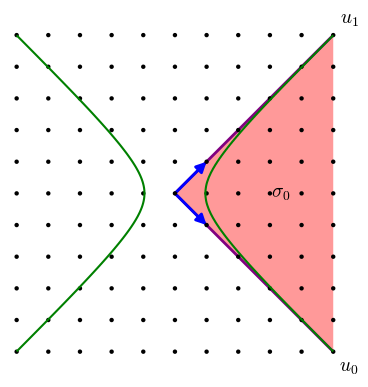

In [83]:
x,y = var('x,y')
levset = implicit_plot(spec_at_e((x,y)) == 0, (-5,5), (-5,5), cmap=['green'])
Plot = levset + cone_plot
Plot.show()

In [55]:
#x,y = var('x,y')
#f(x,y) = Thurston_norm_vars((x,y))
#g = spec_at_e((x,y))
#h = -1*spec_at_e((x,y))

#min_coords = minimize_constrained(f, [g,h], [-1,-1])
#min_coords

In [56]:
#p = spec_at_e((x,y))
#f = Thurston_norm_vars((x,y))
#L = var('L')
#f,p,diff(p,x),diff(p,y)
#solstemp = solve([diff(f,x) == L*diff(p,x), diff(f,y) == L*diff(p,y), p==0], x, y, L, algorithm='sympy', to_poly_solve = 'force')

In [57]:
#norm_dila_log((round(solstemp[1].get(x),2),round(solstemp[1].get(y),2)))

In [58]:
#norm_dila_log((1,-1))

In [59]:
m = mathematica
x,y = var('x,y')
f = str(Thurston_norm_vars((x,y)))
g = str(spec_at_e((x,y)))
newg = g.replace("e", "E")

#start = time.time()
for i in range(len(m('NSolve[{Grad[' + f + ', {x,y}] == L*Grad[' + newg + ', {x,y}], ' + newg + ' == 0}, {x,y,L}, Reals]'))):
    x1 = m('x/.NSolve[{Grad[' + f + ', {x,y}] == L*Grad[' + newg + ', {x,y}], ' + newg + ' == 0}, {x,y,L}, Reals][[' + str(i+1) + ']]')
    y1 = m('y/.NSolve[{Grad[' + f + ', {x,y}] == L*Grad[' + newg + ', {x,y}], ' + newg + ' == 0}, {x,y,L}, Reals][[' + str(i+1) + ']]')
    if cone.interior_contains((x1,y1)):
            min_dir = (x1, y1)
#end = time.time()
#print(end - start)

min_dir

(0.9624236501192069, 0)

In [84]:
def plot_in_one(sig):
    boundaries = taut_polytope.cone_in_homology(sig) # These are rays spanning the cone of carried classes
    rays = taut_polytope.taut_rays(sig) # These are rays spanning the cone of carried surfaces
    P = taut_polytope.projection_to_homology(sig)
    extreme_surfs = []

    for ray in rays: # this for loop stores the surfaces (in terms of their branch equations) that define the boundary of the cone
        if P*ray in boundaries:
            extreme_surfs.append(ray)
        if len(extreme_surfs) == len(boundaries):
            break

    sums = [] # next we add up the number of triangles in the boundary surfaces
    for surf in extreme_surfs:
        count = 0
        for i in range(len(surf)):
            count = count + surf[i]
        sums.append(count)

    tnorms = [term/2 for term in sums] # their Thurston norms are half the number of boundary components
        
    corners = []
    for i in range(len(boundaries)):
        corners.append([0]*len(boundaries[i]))
    
    for i in range(len(corners)): # the corners of the fibered face are the boundaries divided by the Thurston norm.
        for j in range(len(corners[i])):
            corners[i][j] = boundaries[i][j]/tnorms[i]
            
    cone = Cone(corners)
    cone_plot = cone.plot(mode='box', xmin = -5, xmax = 5, ymin = -5, ymax = 5)
    poly = taut_polynomial.taut_polynomial(tri, angle)
    
    x,y = var('x,y')
    levset = implicit_plot(spec_at_e((x,y)) == 0, (-5,5), (-5,5), cmap=['green'])
    Plot = levset + cone_plot
    return Plot
    